In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

In [3]:
sys.path.insert(0, '../')

In [4]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [5]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_mdt.yml')
#my_detector.read_card('../cards/atlas_mdt_eml1.yml')

-- Initializing detector --
-- Reading card --


## Pass muon

In [6]:
my_detector.reset_planes()
my_detector.add_muon(
        mu_x=25., 
        mu_y=0., 
        mu_theta=-0.20, 
        mu_phi=0, 
        mu_time=0
    )

## Add noise

Noise rate in Hertz per tube is set in detector cards. First argument here is a multiplicative scale factor. Second argument is a random seed number.

In [7]:
my_detector.add_noise(1, randseed=42)

## Process signal

In [8]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 1
Total number of hits: 1
Total number of hits: 2
Total number of hits: 4
Total number of hits: 2
Total number of hits: 1


## Plot detector volume

In [9]:
from plotting import plotting

In [10]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '../plotting/plotting.py'>

In [11]:
%matplotlib widget

Found muon signal, plane  0  xseg  5  time  -11.847275268220027
Found muon signal, plane  1  xseg  5  time  9.855445454021295
Found muon signal, plane  2  xseg  5  time  -20.37020385322166
Found bkg signal, plane  2  xseg  6  time  206.21524800680675
Found bkg signal, plane  3  xseg  2  time  -224.96644664266714
Found bkg signal, plane  3  xseg  3  time  181.38912071988807
Found muon signal, plane  3  xseg  4  time  -9.931900616030664
Found bkg signal, plane  3  xseg  6  time  134.4790185821559
Found muon signal, plane  4  xseg  3  time  2.7994295794617177
Found bkg signal, plane  4  xseg  7  time  -34.237343336219055
Found muon signal, plane  5  xseg  3  time  -9.294910395716018
[Point3D(10860146907449825/490033288920621, 0, 14)] [Point3D(-19536260704200475/490033288920621, 0, 320)]


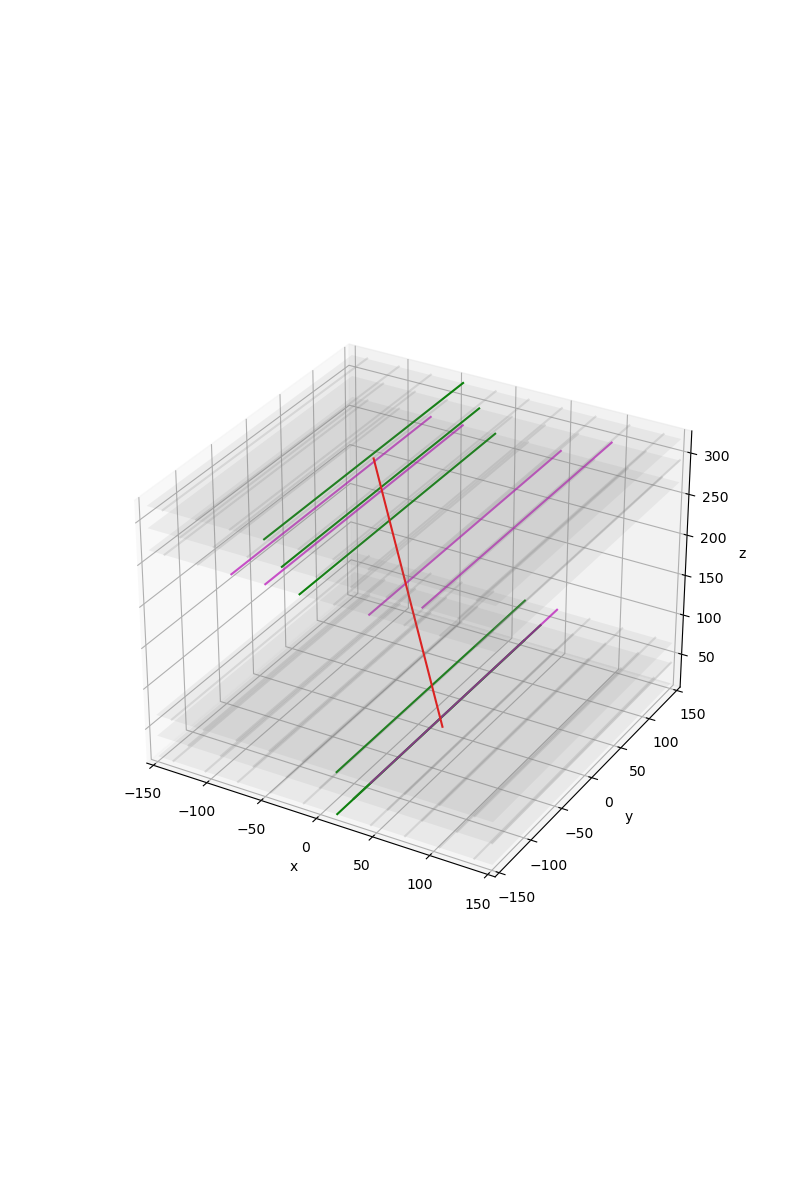

In [12]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)
plt.show()

[Point3D(13244178876991025/490033288920621, 0, -10)] [Point3D(-21920292673741675/490033288920621, 0, 344)]


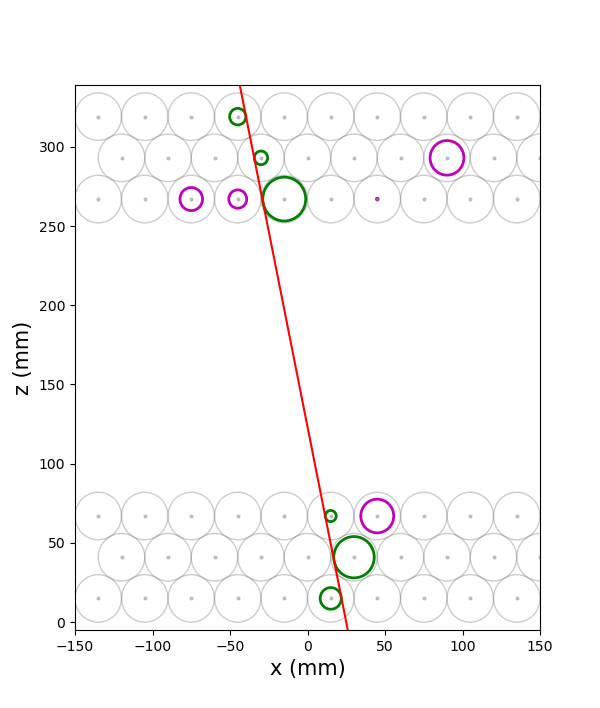

In [13]:
fig2 = plt.figure(figsize=(6,6*1.18))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=False)
plt.show()

[Point3D(13244178876991025/490033288920621, 0, -10)] [Point3D(-21920292673741675/490033288920621, 0, 344)]


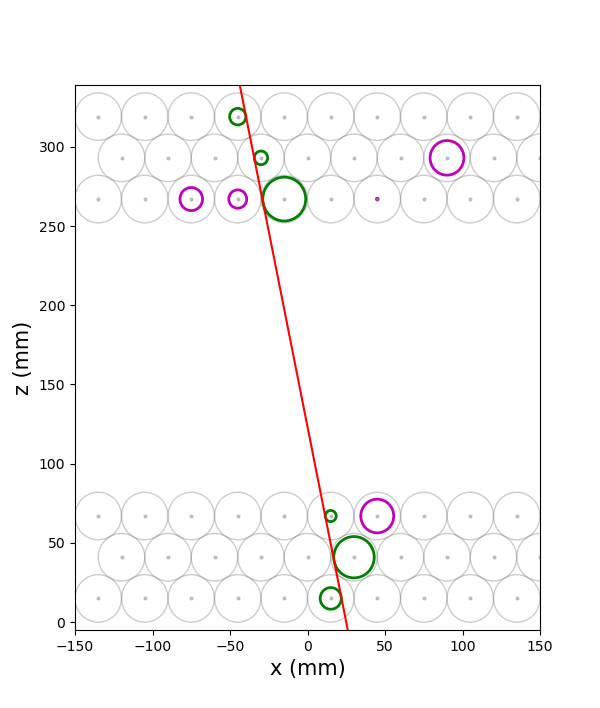

In [14]:
fig3 = plt.figure(figsize=(6,6*1.18))  # good for 10-tube wide atlas_mdt.yml
#fig3 = plt.figure(figsize=(28,6))   # good for 56-tube wide atlas_mdt_eml1.yml
ax3 = plt.axes()
plotting.plot_det_xz(my_detector, ax3, draw_muon=True, draw_allhits=True)
plt.show()